<a href="https://colab.research.google.com/github/CristhiamGonzalez/IA/blob/main/TareaDecissionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importamos el dataset
data = pd.read_csv("Iris.csv")
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [4]:
#Encoding the categorical dependent variable
from sklearn.preprocessing import LabelEncoder
l_encode = LabelEncoder()
y = l_encode.fit_transform(y)

In [5]:
#Splitting the train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 21)

In [6]:
#Para un Decission Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = "entropy", random_state = 21)

In [7]:
#Entrenamos el clasificador de Decission Tree
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=21, splitter='best')

In [8]:
#Para predecir el test result
y_pred = dtc.predict(x_test)
print(y_pred)

[1 0 0 0 1 1 0 2 0 0 1 1 2 2 0 2 2 1 0 2 2 1 2 1 0 1 0 0 1 2]


In [9]:
y_pred_vertical = y_pred.reshape(len(y_pred), 1)
print (y_pred_vertical)

[[1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]
 [0]
 [0]
 [1]
 [1]
 [2]
 [2]
 [0]
 [2]
 [2]
 [1]
 [0]
 [2]
 [2]
 [1]
 [2]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [2]]


In [10]:
y_true_vertical = y_test.reshape(len(y_test),1)
print(y_true_vertical)

[[1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]
 [0]
 [0]
 [1]
 [1]
 [2]
 [2]
 [0]
 [1]
 [2]
 [1]
 [0]
 [2]
 [2]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [2]]


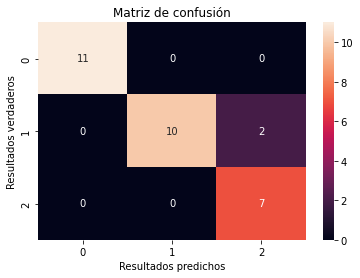

In [11]:
#Para la matriz de conflicto
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot= True)
plt.xlabel("Resultados predichos")
plt.ylabel("Resultados verdaderos")
plt.title("Matriz de confusión")
plt.show()

In [16]:
#Para ver la precisión del modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9333333333333333

In [30]:
#Hallazgo MCC
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.9054519110463853

In [31]:
#Hallazgo F1
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average= 'weighted'))
print(f1_score(y_test, y_pred, average= 'macro'))
print(f1_score(y_test, y_pred, average= 'micro'))

0.9344696969696968
0.9280303030303031
0.9333333333333333


In [32]:
#Comparar
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [14]:
prediction = dtc.predict([[5,3,1.6,0.2]])
print(prediction)

[0]
